<img src="../LogoUTN.jpg" align="right" width="150" /> 

### Procesamiento Digital de Señales - 2024

# Trabajo Práctico Nº5: Primeras nociones de estimación espectral
### Juan Manuel Ronchetti

## Introduccion

Este notebook evalúa una señal definida como:

$$ x(k) = a_1 \cdot \sin(\Omega_1 \cdot k) + n(k) $$

donde:

$$ \Omega_1 = \Omega_0 + \frac{f_r \cdot 2\pi}{N} $$

y 

$$ \Omega_0 = \frac{\pi}{2} $$

Las variables aleatorias están definidas por:

$$ f_r \sim U(-\frac{1}{2}, \frac{1}{2}) $$
$$ n \sim N(0, \sigma^2) $$

Se evaluarán los siguientes estimadores:

$$ \hat{a}_1 = |X(\Omega)| = |F\{x(k)\}| $$
$$ \hat{\Omega}_1 = \arg\max_{\Omega}\{|X(\Omega)|\} $$

Considerando 200 realizaciones de 1000 muestras para cada experimento y parametrizando para SNR's de 3 y 10 dB.

## Preparacion de la simulacion
Se realizaran 2 simulaciones: la primera comprobando los estimadores con 5 realizaciones, y la segunda con 200 realizaciones, para verificar la consistencia de los estimadores.

In [1]:
# -------------------------------------------------------------------------------
#                                   Imports
# -------------------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------------
#                                   Parámetros
# -------------------------------------------------------------------------------

fs = 1000.0  # Frecuencia de muestreo (Hz)
N = 1000     # Cantidad de muestras
cant_realiz = 5  # Cantidad de realizaciones

# Frecuencia normalizada
f0 = fs / N  
ts = 1 / fs  
df = fs / N  

# Frecuencias para SNRs
SNR_db_values = [3, 10]  # SNRs en dB
a1 = 1
w0 = N/4

# Histograma para almacenar resultados
a1_estimates = {snr: [] for snr in SNR_db_values}
omega_estimates = {snr: [] for snr in SNR_db_values}

# Variables para almacenar la última señal y su FFT
last_signals = {}
last_ffts = {}

## Simulacion con 5 realizaciones

In [2]:
# -------------------------------------------------------------------------------
#                                   Simulacion
# -------------------------------------------------------------------------------

for SNR_db in SNR_db_values:
    SNR = 10 ** (SNR_db / 10)  # Conversión a veces
    Ps = (a1 ** 2) / 2
    Pr = Ps / SNR
    
    for realizacion in range(cant_realiz):
        # Generar ruido
        n = np.random.normal(0, np.sqrt(Pr), N)
        
        # Frecuencia aleatoria
        fr = np.random.uniform(-0.5, 0.5)
        w1 = w0 + fr * df
        
        # Tiempo
        k = np.linspace(0, (N - 1) * ts, N).flatten()
        
        # Señal
        signal = a1 * np.sin(2 * np.pi * w1 * k) + n
        
        # FFT y estimación de a1
        fft_signal = np.abs(np.fft.fft(signal) / N)
        
        # Estimador de a1
        a1_estimate = fft_signal[int(N/4)] * 2 
        a1_estimates[SNR_db].append(a1_estimate)
        
        # Estimador de omega
        omega = np.argmax(fft_signal) * df  # Encuentra el índice máximo y lo convierte a frecuencia
        omega_estimate = np.abs( (N/2) - omega )
        omega_estimates[SNR_db].append(omega_estimate)
        
        # Guardar una señal y su FFT para luego graficar
        if realizacion == cant_realiz - 1:
            last_signals[SNR_db] = signal
            last_ffts[SNR_db] = fft_signal

## Gráfico de señales y FFT

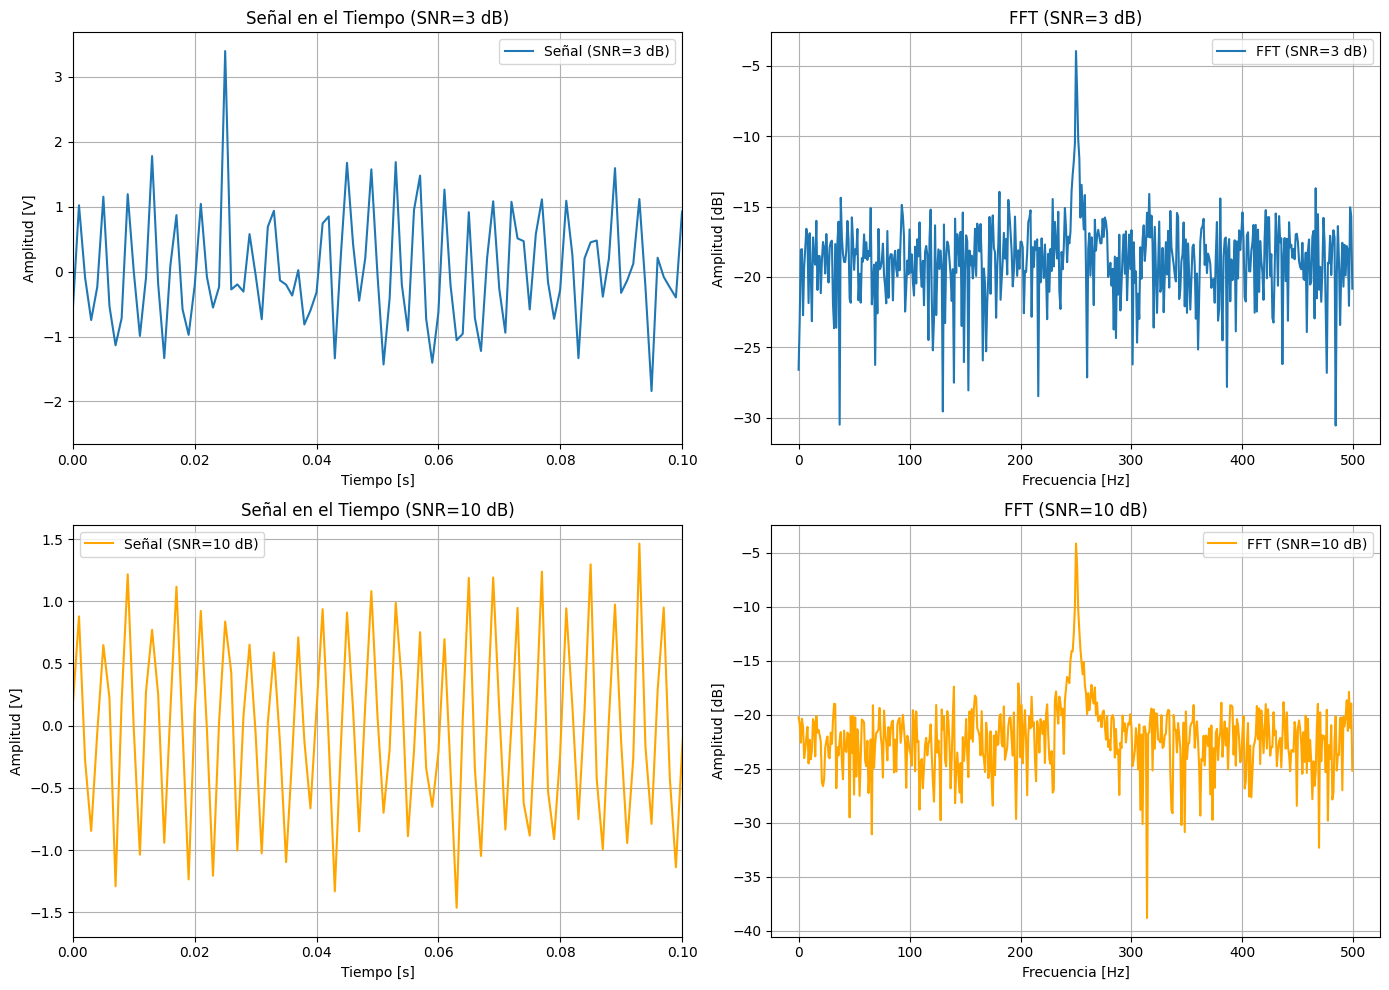

In [3]:
# -------------------------------------------------------------------------------
#                           Grafico de señales y FFTs
# -------------------------------------------------------------------------------
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
frecuencias = np.fft.fftfreq(N, d=ts)

# Señal para SNR de 3 dB
axs[0, 0].plot(np.linspace(0, (N-1)*ts, N), last_signals[3], label='Señal (SNR=3 dB)')
axs[0, 0].set_title('Señal en el Tiempo (SNR=3 dB)')
axs[0, 0].set_xlabel('Tiempo [s]')
axs[0, 0].set_ylabel('Amplitud [V]')
axs[0, 0].set_xlim(0, 100*ts) 
axs[0, 0].legend()
axs[0, 0].grid()

# FFT para SNR de 3 dB
axs[0, 1].plot(frecuencias[:N//2], 10*np.log10(last_ffts[3][:N//2]), label='FFT (SNR=3 dB)')
axs[0, 1].set_title('FFT (SNR=3 dB)')
axs[0, 1].set_xlabel('Frecuencia [Hz]')
axs[0, 1].set_ylabel('Amplitud [dB]')
axs[0, 1].legend()
axs[0, 1].grid()

# Señal para SNR de 10 dB
axs[1, 0].plot(np.linspace(0, (N-1)*ts, N), last_signals[10], label='Señal (SNR=10 dB)', color='orange')
axs[1, 0].set_title('Señal en el Tiempo (SNR=10 dB)')
axs[1, 0].set_xlabel('Tiempo [s]')
axs[1, 0].set_ylabel('Amplitud [V]')
axs[1, 0].set_xlim(0, 100*ts)
axs[1, 0].legend()
axs[1, 0].grid()

# FFT para SNR de 10 dB
axs[1, 1].plot(frecuencias[:N//2], 10*np.log10(last_ffts[10][:N//2]), label='FFT (SNR=10 dB)', color='orange')
axs[1, 1].set_title('FFT (SNR=10 dB)')
axs[1, 1].set_xlabel('Frecuencia [Hz]')
axs[1, 1].set_ylabel('Amplitud [dB]')
axs[1, 1].legend()
axs[1, 1].grid()

plt.tight_layout()
plt.show()

## Histogramas de los estimadores con 5 realizaciones

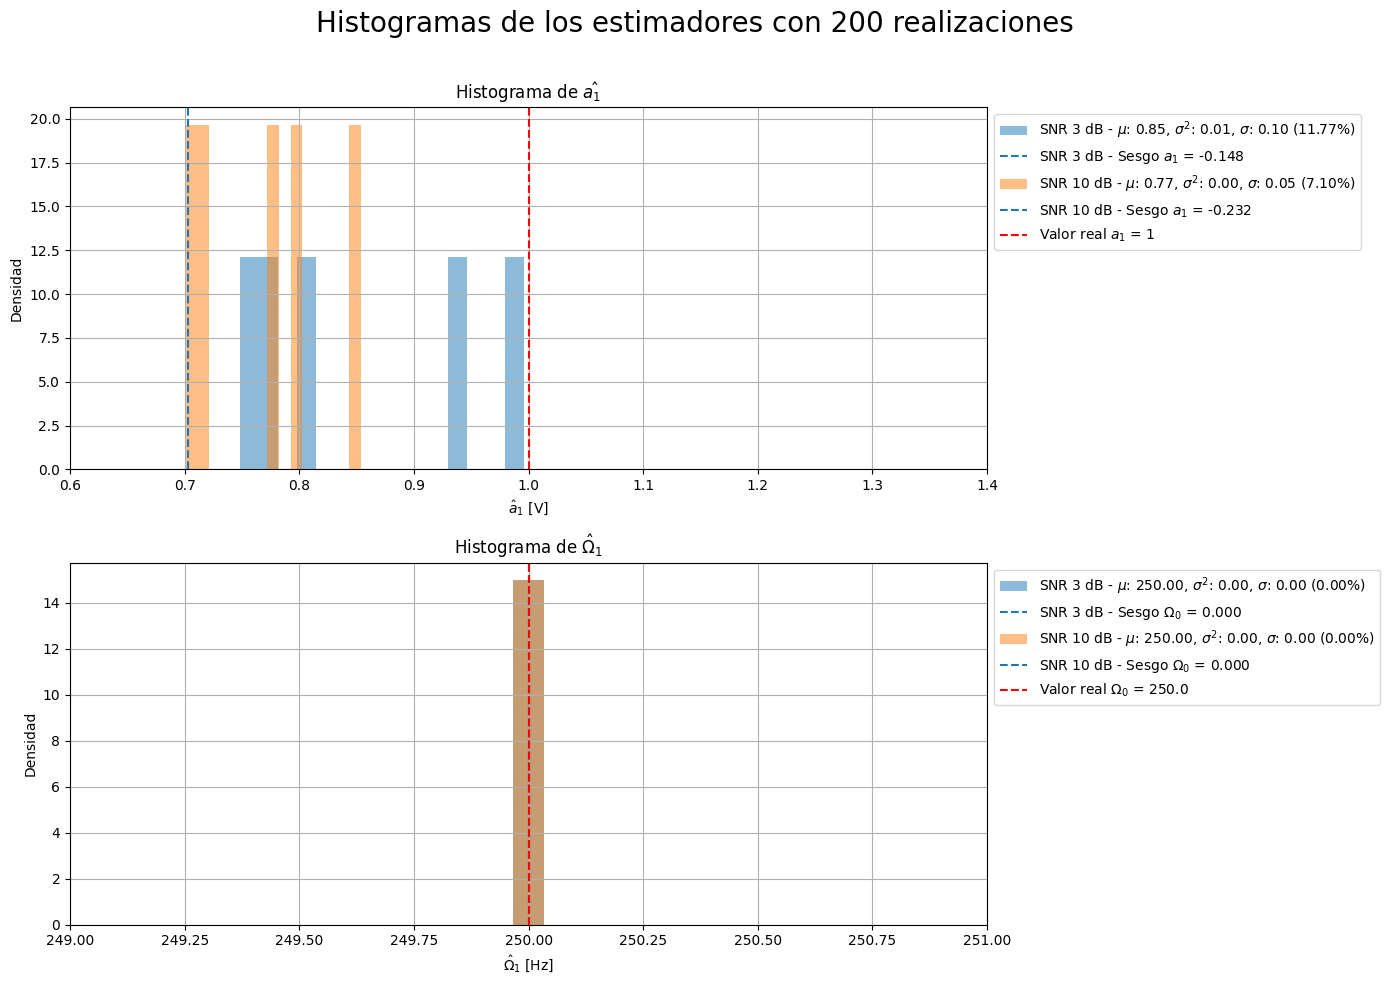

In [4]:
# -------------------------------------------------------------------------------
#                           Grafico de histogramas
# -------------------------------------------------------------------------------
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

plt.suptitle("Histogramas de los estimadores con 200 realizaciones\n", size = 20);

# Histograma de a_1
for snr in SNR_db_values:
    mean_a1_estimate = np.mean(a1_estimates[snr])  # Media
    var_a1_estimate = np.var(a1_estimates[snr])     # Varianza
    std_a1_estimate = np.std(a1_estimates[snr])     # Desvio
    percent_std_a1 = (std_a1_estimate / mean_a1_estimate) * 100  # Desvio sobre la media
    sesgo_a1 = np.mean(np.array(a1_estimates[snr]) - a1) # Sesgo

    axs[0].hist(a1_estimates[snr], bins=15, alpha=0.5, 
                label=f'SNR {snr} dB - $\mu$: {mean_a1_estimate:.2f}, $\sigma^2$: {var_a1_estimate:.2f}, $\sigma$: {std_a1_estimate:.2f} ({percent_std_a1:.2f}%)', 
                density=True)
    axs[0].axvline(mean_a1_estimate + sesgo_a1, linestyle='--', label=f'SNR {snr} dB - Sesgo $a_1$ = {sesgo_a1:.3f}')
    

axs[0].set_title('Histograma de $\\hat{a_1}$')
axs[0].set_xlabel('$\hat{a}_1$ [V]')
axs[0].set_ylabel('Densidad')
axs[0].axvline(a1, color='red', linestyle='--', label=f'Valor real $a_1$ = {a1}')
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[0].grid()
axs[0].set_xlim(a1*0.6, a1*1.4) # Para mejor visualizacion

# Histograma de Ω^1
for snr in SNR_db_values:
    mean_omega_estimate = np.mean(omega_estimates[snr])  # Media
    var_omega_estimate = np.var(omega_estimates[snr])     # Varianza
    std_omega_estimate = np.std(omega_estimates[snr])     # Desvio
    percent_std_omega = (std_omega_estimate / mean_omega_estimate) * 100  # Desvio sobre la media
    sesgo_omega = np.mean(np.array(omega_estimates[snr]) - w0) # Sesgo

    axs[1].hist(omega_estimates[snr], bins=15, alpha=0.5, 
                label=f'SNR {snr} dB - $\mu$: {mean_omega_estimate:.2f}, $\sigma^2$: {var_omega_estimate:.2f}, $\sigma$: {std_omega_estimate:.2f} ({percent_std_omega:.2f}%)', 
                density=True)
    axs[1].axvline(mean_omega_estimate + sesgo_omega, linestyle='--', label=f'SNR {snr} dB - Sesgo $\\Omega_0$ = {sesgo_omega:.3f}')

axs[1].set_title('Histograma de $\\hat{\\Omega}_1$')
axs[1].set_xlabel('$\\hat{\\Omega}_1$ [Hz]')
axs[1].set_ylabel('Densidad')
axs[1].axvline(w0, color='red', linestyle='--', label=f'Valor real $\\Omega_0$ = {w0}')
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[1].grid()
axs[1].set_xlim(w0-1, w0+1)  # Para mejor visualizacion

plt.tight_layout()
plt.show()

## Simulacion con 200 realizaciones

In [5]:
# -------------------------------------------------------------------------------
#                                   Simulacion
# -------------------------------------------------------------------------------

cant_realiz = 200 - cant_realiz

for SNR_db in SNR_db_values:
    SNR = 10 ** (SNR_db / 10)  # Conversión a veces
    Ps = (a1 ** 2) / 2
    Pr = Ps / SNR
    
    for realizacion in range(cant_realiz):
        # Generar ruido
        n = np.random.normal(0, np.sqrt(Pr), N)
        
        # Frecuencia aleatoria
        fr = np.random.uniform(-0.5, 0.5)
        w1 = w0 + fr * df
        
        # Tiempo
        k = np.linspace(0, (N - 1) * ts, N).flatten()
        
        # Señal
        signal = a1 * np.sin(2 * np.pi * w1 * k) + n
        
        # FFT y estimación de a1
        fft_signal = np.abs(np.fft.fft(signal) / N)
        
        # Estimador de a1
        a1_estimate = fft_signal[int(N/4)] * 2 
        a1_estimates[SNR_db].append(a1_estimate)
        
        # Estimador de omega
        omega = np.argmax(fft_signal) * df  # Encuentra el índice máximo y lo convierte a frecuencia
        omega_estimate = np.abs( (N/2) - omega )
        omega_estimates[SNR_db].append(omega_estimate)
        
        # Guardar una señal y su FFT para luego graficar
        if realizacion == cant_realiz - 1:
            last_signals[SNR_db] = signal
            last_ffts[SNR_db] = fft_signal

## Histogramas de los estimadores con 200 realizaciones

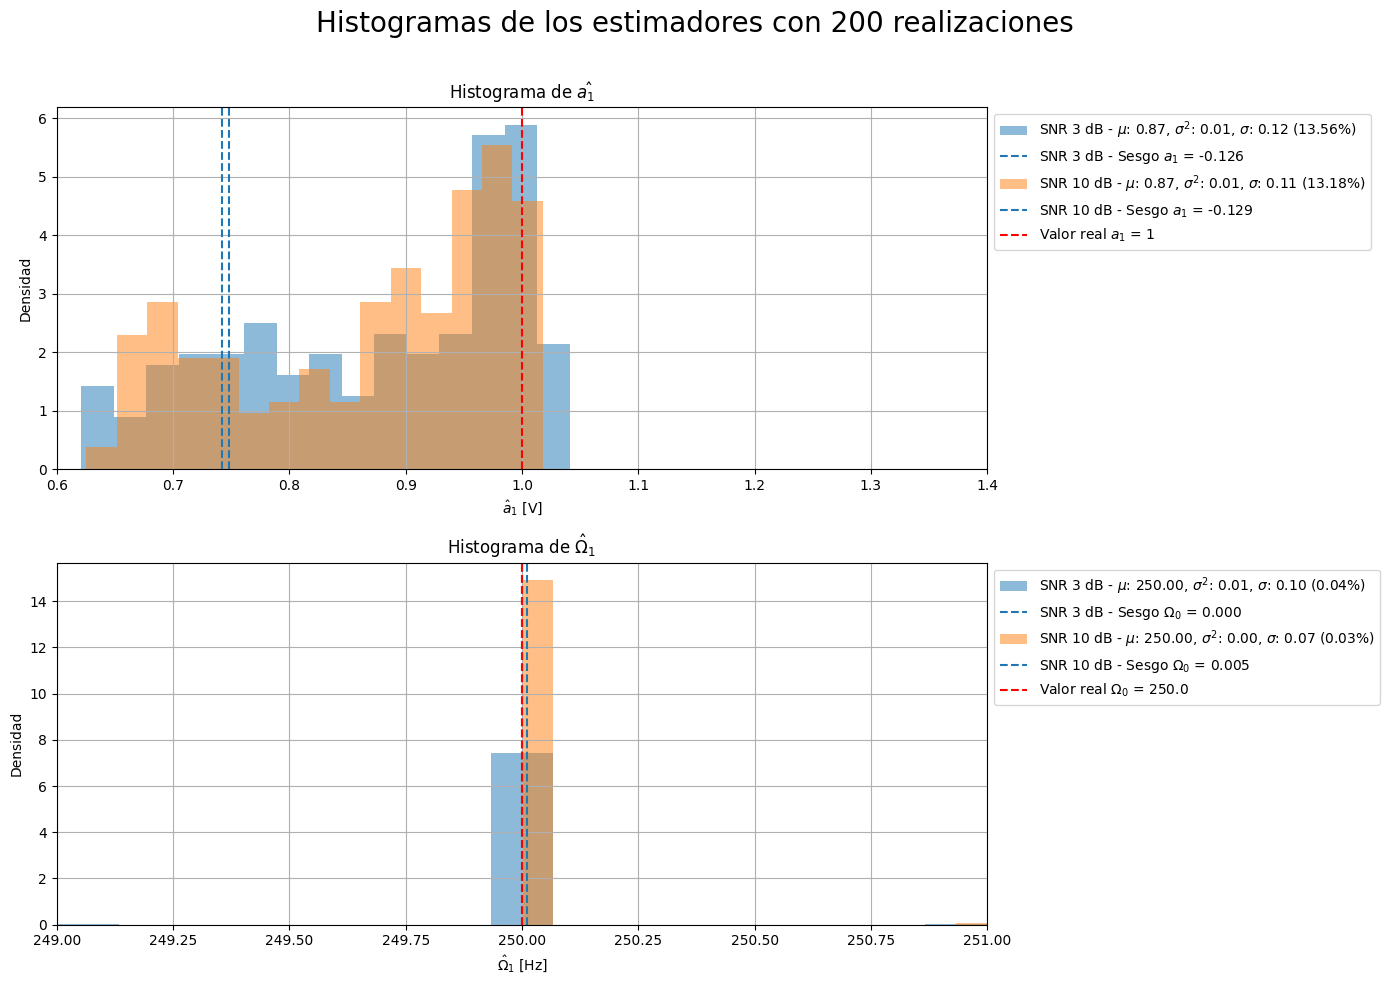

In [6]:
# -------------------------------------------------------------------------------
#                           Grafico de histogramas
# -------------------------------------------------------------------------------
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

plt.suptitle("Histogramas de los estimadores con 200 realizaciones\n", size = 20);

# Histograma de a_1
for snr in SNR_db_values:
    mean_a1_estimate = np.mean(a1_estimates[snr])  # Media
    var_a1_estimate = np.var(a1_estimates[snr])     # Varianza
    std_a1_estimate = np.std(a1_estimates[snr])     # Desvio
    percent_std_a1 = (std_a1_estimate / mean_a1_estimate) * 100  # Desvio sobre la media
    sesgo_a1 = np.mean(np.array(a1_estimates[snr]) - a1) # Sesgo

    axs[0].hist(a1_estimates[snr], bins=15, alpha=0.5, 
                label=f'SNR {snr} dB - $\mu$: {mean_a1_estimate:.2f}, $\sigma^2$: {var_a1_estimate:.2f}, $\sigma$: {std_a1_estimate:.2f} ({percent_std_a1:.2f}%)', 
                density=True)
    axs[0].axvline(mean_a1_estimate + sesgo_a1, linestyle='--', label=f'SNR {snr} dB - Sesgo $a_1$ = {sesgo_a1:.3f}')
    

axs[0].set_title('Histograma de $\\hat{a_1}$')
axs[0].set_xlabel('$\hat{a}_1$ [V]')
axs[0].set_ylabel('Densidad')
axs[0].axvline(a1, color='red', linestyle='--', label=f'Valor real $a_1$ = {a1}')
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[0].grid()
axs[0].set_xlim(a1*0.6, a1*1.4) # Para mejor visualizacion

# Histograma de Ω^1
for snr in SNR_db_values:
    mean_omega_estimate = np.mean(omega_estimates[snr])  # Media
    var_omega_estimate = np.var(omega_estimates[snr])     # Varianza
    std_omega_estimate = np.std(omega_estimates[snr])     # Desvio
    percent_std_omega = (std_omega_estimate / mean_omega_estimate) * 100  # Desvio sobre la media
    sesgo_omega = np.mean(np.array(omega_estimates[snr]) - w0) # Sesgo

    axs[1].hist(omega_estimates[snr], bins=15, alpha=0.5, 
                label=f'SNR {snr} dB - $\mu$: {mean_omega_estimate:.2f}, $\sigma^2$: {var_omega_estimate:.2f}, $\sigma$: {std_omega_estimate:.2f} ({percent_std_omega:.2f}%)', 
                density=True)
    axs[1].axvline(mean_omega_estimate + sesgo_omega, linestyle='--', label=f'SNR {snr} dB - Sesgo $\\Omega_0$ = {sesgo_omega:.3f}')

axs[1].set_title('Histograma de $\\hat{\\Omega}_1$')
axs[1].set_xlabel('$\\hat{\\Omega}_1$ [Hz]')
axs[1].set_ylabel('Densidad')
axs[1].axvline(w0, color='red', linestyle='--', label=f'Valor real $\\Omega_0$ = {w0}')
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[1].grid()
axs[1].set_xlim(w0-1, w0+1)  # Para mejor visualizacion

plt.tight_layout()
plt.show()

## Analisis y conclusiones
Se genero una señal senoidal de frecuencia normalizada, y se le agregaron variaciones aleatorias en su amplitud y en su frecuencia. Se propuso hallar los valores de amplitud y frecuencia, y para eso se definieron estimadores para cada uno, $\hat{a}_1$ y $\hat{\Omega}_1$ .

Se realizaron 2 corridas, una de 5 realizaciones, y otra de 200, y se obtuvieron histogramas e indicadores para cada corrida. A partir de los resultados de las simulaciones, se observaron los siguientes resultados:
#### Sesgo:
- $\hat{a}_1$ es un estimador sesgado, ya que el valor de su media es diferente al valor real.
- $\hat{\Omega}_1$ es un estimador insesgado, ya que el valor de su media es igual al valor real.
#### Consistencia:
- $\hat{a}_1$ no es un estimador consistente, ya que el valor de su media no se aproxima al valor real cuantas mas realizaciones se hacen.
- $\hat{\Omega}_1$ es un estimador consistente.
#### Eficiencia:
- $\hat{\Omega}_1$ es un estimador mucho mas eficiente que $\hat{a}_1$ ya que su varianza es mucho menor.

Se concluye que $\hat{\Omega}_1$ resulto un excelente estimador para la frecuencia de la señal senoidal, mientras que si bien $\hat{a}_1$ se acerca al valor real de ${a}_1$, posee un desvio sobre la media mayor al 10%, por lo cual no es muy preciso.

A su vez, no se distinguen diferencias en los estimadores al variar la SNR.